## Descriptive Data Analysis

In [17]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_quality_checks import get_total_missing_percentage, check_missing_data
from src.descriptive_statistics import describe_numerical, summarize_categorical

In [2]:
# Loading historical data
file_path = "../data/MachineLearningRating_v3.txt"

df = pd.read_csv(file_path, sep='|', low_memory=False)

df.head(5)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
# Total number rows in the dataset
len(df)

1000098

In [4]:
# compute date range in the dataset
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

min_date = df['TransactionMonth'].min()
max_date = df['TransactionMonth'].max()

print('Date Range:')
print('Min Date:', min_date)
print('Max Date:', max_date)

Date Range:
Min Date: 2013-10-01 00:00:00
Max Date: 2015-08-01 00:00:00


In [5]:
# checking data types
df.dtypes

UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                               object
Cylinders  

In [6]:
# checking for columns with missing values
missing_data = check_missing_data(df)
print(missing_data)

                Column Name  Missing Values  Percentage Missing
8                      Bank          145961           14.594670
9               AccountType           40232            4.022806
10            MaritalStatus            8259            0.825819
11                   Gender            9536            0.953507
18                   mmcode             552            0.055195
19              VehicleType             552            0.055195
21                     make             552            0.055195
22                    Model             552            0.055195
23                Cylinders             552            0.055195
24            cubiccapacity             552            0.055195
25                kilowatts             552            0.055195
26                 bodytype             552            0.055195
27            NumberOfDoors             552            0.055195
28         VehicleIntroDate             552            0.055195
29      CustomValueEstimate          779

In [7]:
# check total missing values percentage in the dataset
missing_values = get_total_missing_percentage(df)
print(missing_values)

9.74452195992485


In [8]:
# descriptive analysis for numerical datasets
numerical_desc_analysis = describe_numerical(df)
print(numerical_desc_analysis)

       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

In [9]:
# summerization for categorical datasets
categorical_summary = summarize_categorical(df)

# Display summary using tabulate
for col, summary in categorical_summary.items():
    print(f"\n{col}:\n{tabulate(summary.reset_index(), headers='keys', tablefmt='psql')}")


Citizenship:
+----+---------------+---------+
|    | Citizenship   |   count |
|----+---------------+---------|
|  0 |               |  895210 |
|  1 | ZA            |  103721 |
|  2 | ZW            |     936 |
|  3 | AF            |     231 |
+----+---------------+---------+

LegalType:
+----+-------------------+---------+
|    | LegalType         |   count |
|----+-------------------+---------|
|  0 | Individual        |  911929 |
|  1 | Private company   |   83891 |
|  2 | Close Corporation |    2459 |
|  3 | Public company    |    1295 |
|  4 | Partnership       |     331 |
|  5 | Sole proprieter   |     193 |
+----+-------------------+---------+

Title:
+----+---------+---------+
|    | Title   |   count |
|----+---------+---------|
|  0 | Mr      |  933555 |
|  1 | Mrs     |   45850 |
|  2 | Ms      |   13269 |
|  3 | Miss    |    6614 |
|  4 | Dr      |     810 |
+----+---------+---------+

Language:
+----+------------+---------+
|    | Language   |   count |
|----+------------

In [14]:
# Define the column groups based on the provided structure

insurance_policy_columns = ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth']
client_columns = ['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender']
client_location_columns = ['Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone']
car_insured_columns = ['ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']
plan_columns = ['SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']
payment_claim_columns = ['TotalPremium', 'TotalClaims']

df_insurance_policy = df[insurance_policy_columns]
df_client = df[client_columns]
df_client_location = df[client_location_columns]
df_car_insured = df[car_insured_columns]
df_plan = df[plan_columns]
df_payment_claim = df[payment_claim_columns]

df_insurance_policy.head(10)

,UnderwrittenCoverID,PolicyID,TransactionMonth
0,145249,12827,2015-03-01
1,145249,12827,2015-05-01
2,145249,12827,2015-07-01
3,145255,12827,2015-05-01
4,145255,12827,2015-07-01
5,145247,12827,2015-01-01
6,145247,12827,2015-04-01
7,145247,12827,2015-06-01
8,145247,12827,2015-08-01
9,145245,12827,2015-03-01


In [25]:
# Function to plot histograms for numerical variables
def plot_numerical_histograms(df):
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Function to plot bar charts for categorical variables
def plot_categorical_bar_charts(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        df[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Bar Chart of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

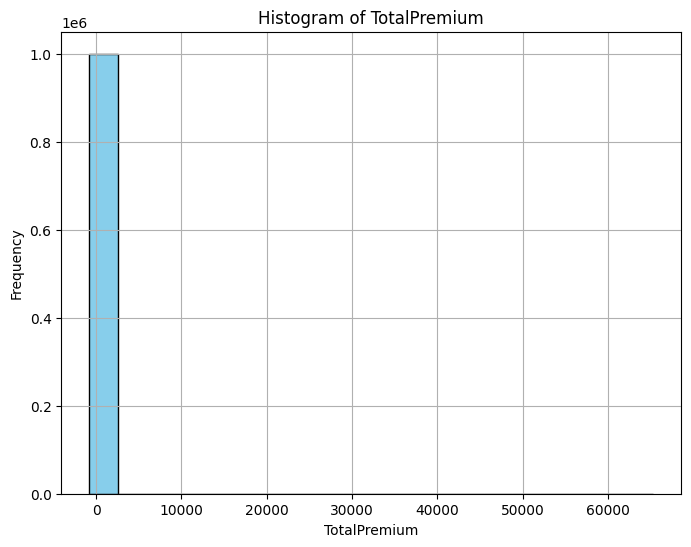

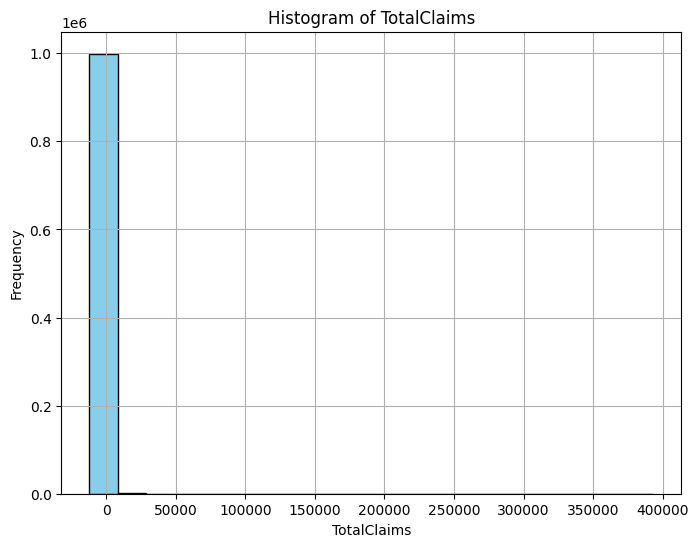

In [26]:
plot_numerical_histograms(df_payment_claim)

In [27]:
plot_categorical_bar_charts(df_payment_claim)